In [1]:
import Laplacians as Lap
using SparseArrays
using LinearAlgebra
using Random
using Plots
using Graphs
using SNAPDatasets
using GraphIO

In [2]:
# get a graph, its laplacians and its ldli
NUMNODES = 500000
# G = Lap.pure_random_graph(NUMNODES)
# G = Lap.ErdosRenyi(NUMNODES, NUMNODES * 5)
# G = Float64.(sparse(loadsnap(:email_enron)))
g = loadgraph("graph/web-Google.txt", "graph_key", EdgeListFormat())
# g = loadgraph("graph/email-Enron.txt", "graph_key", EdgeListFormat())
g = SimpleGraph(g)
g = induced_subgraph(g, connected_components(g)[1])[1]
G = Float64.(sparse(SimpleGraph(g)))
# G = Float64.(sparse(SimpleGraph(loadgraph("graph/web-Google.txt", "graph_key", EdgeListFormat()))))
# G = Float64.(sparse(erdos_renyi(NUMNODES, NUMNODES * 5)))

855802×855802 SparseMatrixCSC{Float64, Int64} with 8582704 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡄⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡄⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡄⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠉⠉⠛⠛⠿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠙⠛⠛⠻⠿⠿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠛⠛⠛⠻⠿⠿⠿⣿⣿⣿⠀⠀⠀⠀⠀⠀

In [3]:
lapG = Lap.lap(G)

855802×855802 SparseMatrixCSC{Float64, Int64} with 9438506 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡄⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡄⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡄⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠉⠉⠛⠛⠿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠑⢄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠙⠛⠛⠻⠿⠿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠑⢄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠛⠛⠛⠻⠿⠿⠿⣿⣿⣿⠀⠀⠀⠀⠑⢄

In [4]:
ldliG = Lap.approxChol(Lap.LLmatp(G))

Laplacians.LDLinv{Int64, Float64}([855802, 855801, 726209, 855800, 855799, 855798, 855797, 855796, 855795, 855794  …  8494, 9690, 8495, 8496, 9692, 2580, 2582, 2586, 1424, 3815], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  5324134, 5324142, 5324148, 5324151, 5324157, 5324160, 5324163, 5324165, 5324167, 5324168], [726209, 726209, 519321, 726187, 726182, 726171, 726142, 726124, 726124, 726124  …  2586, 1424, 3815, 2586, 1424, 3815, 1424, 3816, 3815, 3816], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.49200472551901486, 1.0, 0.0005948875883871661, 0.3385220060743156, 1.0, 0.0007502701065903013, 1.0, 0.33067077244290455, 1.0, 1.0], [29.552284547727396, 9.323362565892978, 0.07264659074073168, 12.388743185237203, 27.74125823188386, 0.10000000000000021, 3.8596091786213527, 4.855821923802514, 1.3994444912381543, 5.2692332728636915  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

Analyze the parallelism for `forward!()` pass. This performs analysis for two possible ways of execution: a) level scheduling. b) "synchronization free". Both of the name are borrowed from the methods used to solve a triangular linear system(SpTRSV). Although the details differ, SpTRSV shares similar property with our tasks.

a) level scheduling.
Iterations are grouped as levels, and levels are scheduled sequentially. Iterations within a level can be concurrently executed. Synchronization points are inserted between iterations. 

The `levelSets` data structure is an array of arraies. The array at `i` is the indices of iterations that is scheduled in level `i`. 

b) "synchronization free".
Literatures for SpTRSV identifies the synchronization between iterations are costly. Thus, Liu et. al proposes using atomic counters to check dependencies between operations. When a counter reaches certain value, the dependency for an operation is satisfied. Before that, threads will wait. This avoid the division of `level` as well as the costly synchronization.

The `count` is an array of counter for each iteration. Each iteration `i` depends only on the value pointed by `col[i]`. Before the iteration can start, all its pervious iterations should finishing updates for this variable. The `count[i]` keeps track of how many remaining updates are needed.

There are variations based on these two ideas to get better performance.

In [5]:
function analyzeForward(ldli)
    levelSets = Vector{Vector{Int64}}(undef, 0)
    numLevels = 0

    count = zeros(Int64, size(ldli.col, 1) + 1)
    levels = ones(Int64, size(ldli.col, 1) + 1) # all start with level 1

    for it in 1:length(ldli.col)
        i = ldli.col[it]
    
        j0 = ldli.colptr[it]
        j1 = ldli.colptr[it + 1] - 1
        
        for up in j0:j1
            uprow = ldli.rowval[up]
            if uprow != i # self edge should not count
                count[uprow] = count[uprow] + 1 # following iteration that depends need another update
                levels[uprow] = max(levels[uprow], levels[i] + 1)
            end
        end
        
        if levels[i] > numLevels
            numLevels = numLevels + 1
            push!(levelSets, [i])
        else
            push!(levelSets[levels[i]], i)
        end
    end
    
    return levelSets, numLevels, count
end

function showOperationForward(ldli, adj)
    ops = zeros(Int64, size(adj, 1), size(adj, 2) - 1)
    for it in 1:length(ldli.col)
        op = zeros(Int64, size(adj, 1))
        
        j0 = ldli.colptr[it]
        j1 = ldli.colptr[it + 1] - 1
        
        for up in j0:j1
            op[ldli.rowval[up]] = ldli.rowval[up]
        end
        ops[:, it] = op
    end
    display(ldli.col')
    display(ops)
end

showOperationForward (generic function with 1 method)

In [6]:
leveSets, numLevels, count = analyzeForward(ldliG)

([[855802, 855801, 855800, 855799, 855798, 855797, 855796, 855795, 855794, 855793  …  643392, 376327, 719060, 713854, 379811, 88025, 708492, 630176, 583281, 680353], [726209, 726105, 726036, 726026, 726023, 725997, 725980, 725855, 725677, 725607  …  101893, 94509, 93451, 16821, 20962, 11094, 54842, 99572, 138696, 1851], [699539, 660671, 664974, 685282, 847418, 524308, 742105, 740080, 175592, 266665  …  267146, 267144, 93452, 6487, 20987, 72438, 138697, 16820, 36747, 37049], [579010, 641488, 710709, 698725, 847065, 445544, 643185, 642491, 174166, 637235  …  49673, 77520, 93453, 89771, 20963, 23919, 6486, 16823, 2902, 66614], [649526, 546671, 794225, 655374, 793968, 746604, 731247, 716650, 514177, 93098  …  54924, 94349, 93454, 68749, 17349, 44577, 12839, 91558, 3735, 728190], [766741, 321746, 604466, 520615, 17645, 514178, 835448, 362479, 533368, 378098  …  93455, 2326, 52343, 44579, 93599, 58876, 45161, 91559, 13773, 458], [783949, 17643, 394925, 582487, 141108, 95176, 679964, 637288, 

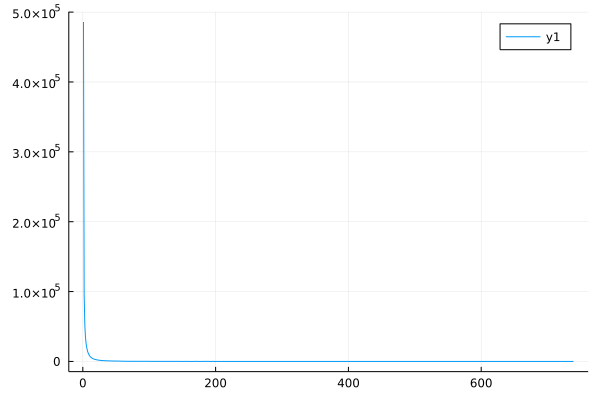

In [7]:
numAtLevel = [length(l) for l in leveSets]
plot(1:numLevels, numAtLevel)

For the `backward!()`, dependencies reverse. At this point, only consdier the level-set algorithm

In [8]:
# the analyzer
function analyzeBackward(ldli)
    levelSets = Vector{Vector{Int64}}(undef, 0)
    numLevels = 0

    # each entry for a row entry
    # initially every row is at 0
    levels = zeros(Int64, size(ldli.col, 1) + 1) 

    for it in length(ldli.col):-1:1
        i = ldli.col[it]
    
        j0 = ldli.colptr[it]
        j1 = ldli.colptr[it + 1] - 1
        
        # find the maximum level for all of its source
        curMax = levels[i]
        for up in j0:j1
            uprow = ldli.rowval[up]
            curMax = max(curMax, levels[uprow])
        end
        
        levels[i] = curMax + 1 # add 1 so that this iteration happens after the next level
        
        if levels[i] > numLevels
            numLevels = numLevels + 1
            push!(levelSets, [it]) # push the iteration number
        else
            push!(levelSets[levels[i]], it) # push the iteration number
        end
    end
    
    return levelSets, numLevels
end

analyzeBackward (generic function with 1 method)

In [9]:
blevelSets, bnumLevels = analyzeBackward(ldliG)

([[855801, 146050, 143764, 139985, 139125, 133366, 130637, 129844, 129278, 129029  …  104731, 101209, 101191, 99090, 97811, 96033, 95046, 94995, 94828, 94373], [855800, 258506, 258439, 258436, 258403, 258370, 258292, 258290, 258239, 258121  …  101550, 99970, 99757, 99521, 98102, 97654, 96602, 95905, 95570, 93420], [855799, 738010, 658699, 570418, 337778, 246205, 186815, 150342, 150086, 149841  …  95398, 95088, 95006, 94967, 93639, 93616, 93530, 93477, 6583, 2756], [855798, 658698, 570417, 246204, 216001, 210664, 210663, 186814, 93000, 6582, 2755], [855797, 658697, 570416, 302067, 171569, 2754, 2753, 2752, 2751], [855796, 658696, 539248, 385838], [855795, 658695, 539247], [855794, 533998], [855793, 520717], [855792, 520716]  …  [739849, 719139, 714100, 702478, 690445, 690277, 689838, 689810, 682079, 677554  …  13607, 8802, 6483, 4634, 4633, 4632, 2517, 2516, 1985, 1984], [719138, 716833, 702477, 690444, 684778, 666446, 660556, 658600, 655326, 641180  …  16500, 16499, 16498, 16497, 16496

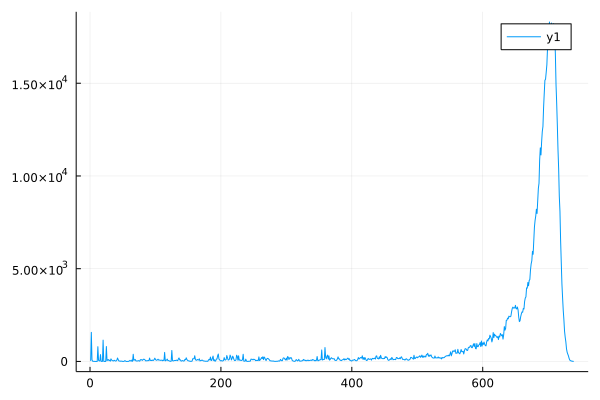

In [10]:
bnumAtLevel = [length(l) for l in blevelSets]
plot(1:bnumLevels, bnumAtLevel)